## **Welcome to the Final Step**
Welcome to the final, and most exciting, step! We're thrilled you're here. At Carbon Jar, we're not just writing code; we're building an **AI-powered future for carbon accounting in North Africa**, starting from a blank canvas. This is your chance to show us how your AI expertise can help us solve some truly unique and impactful problems.

This isn't your standard exam. Think of it as a collaborative challenge – a glimpse into the groundbreaking work we'll do together.

**Your AI Mission:**

* **Time:** You have **up to 25 hours** over **5 days**.
* **Our Take on Time:** This is a marathon, not just a sprint! 25 hours for these deep AI challenges is demanding. **You are not expected to complete everything.** Please, focus your energy. We want to see 5-7 questions answered *brilliantly*, with working code and clear explanations, rather than 20 surface-level attempts. **Depth, creativity, and robust AI implementation** are what we're looking for.
* **Integrity:** Our culture is built on trust and innovation. We need to see *your* authentic problem-solving skills – **no AI assistance (like Copilot, ChatGPT, etc.)** in completing this, please. We want to see *your* intelligence shine!
* **Submission:** Use **GitHub**. Organize your code, notebooks, and explanations logically. Include a `README.md` to guide us through your solutions. Share the link!
* **Questions?** Building the future means asking questions. We're here to help – reach out if anything is unclear.

**Tips for Success:**
* **Prioritize:** Choose the AI challenges that ignite your passion and showcase your best work.
* **Build Smart:** Write clean, well-commented Python/ML code. Think about reproducibility and MLOps.
* **Explain Your 'Why':** Why *this* model? *This* architecture? *This* validation strategy?
* **Debug with Grit:** AI code rarely works the first time. Show us your debugging prowess.
* **Stay Well:** This is tough. Take breaks. We value your well-being!

Ready to apply AI to one of the world's most critical challenges? Let's begin!

---

## The AI Build-from-Scratch Challenges 💡

### 1. Designing AI-Powered Emissions Anomaly Detection 📈

**Scenario:** We need a real-time pipeline to detect anomalies in diverse emissions data streams, considering seasonality and noise.

**Tasks:**
* **Architect & Build:** Design an end-to-end pipeline. **Implement a basic `LSTM Autoencoder` in `PyTorch` or `TensorFlow`.** The provided snippet has a flawed structure. **Fix the model architecture** (ensure input/output shapes match, layers are appropriate) and **write a basic training loop** (using simulated data) that calculates reconstruction error.
* **Refine:** Explain your choices and how you'd handle preprocessing (scaling, detrending) and feature extraction for real-world deployment.
**Code Sample (`PyTorch` LSTM AE - Needs Fixing!):*

In [14]:
import torch
import torch.nn as nn

class LSTM_AE(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=32, n_layers=1):
        super(LSTM_AE, self).__init__()
        # PROBLEM 1: Encoder/Decoder might be mismatched or too simple.
        self.encoder = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)
        # PROBLEM 2: How does the decoder reconstruct the original sequence length & dim?
        self.decoder = nn.LSTM(hidden_dim, input_dim, n_layers, batch_first=True)

    def forward(self, x):
        # PROBLEM 3: How to get the *final* hidden state to feed the decoder?
        # PROBLEM 4: Decoder needs an initial input. How to provide it?
        _, (hidden, _) = self.encoder(x)
        outputs, _ = self.decoder(hidden.permute(1, 0, 2)) # This won't work.
        return outputs

# PROBLEM 5: Needs a training loop: Generate sample data, run model, calc MSE loss.
# Our Take: LSTMs are great for sequences, but building a working Autoencoder
# requires careful architecture. Fix this model and show us a basic training setup.

# TASK 1 : Resolution

**Discussion:**

For this task, I developed a functional prototype for detecting anomalies in multivariate time series data using a LSTM AE architecture. The implementation covers the entire pipeline : from data simulation to model training and visualization — and lays the groundwork for a future transition toward a real-time system.

1. Data Simulation

`data_simulator` class that generates synthetic multivariate time series data. Each feature simulates a seasonal pattern with added Gaussian noise to replicate real-world variability.

To evaluate the model’s robustness, I injected two types of anomalies :  

  * Point anomalies: Random spikes in individual features.

  * Correlated feature anomalies: Sudden opposite deviations in two features at the same timestamp.

2. Data Preprocessing

Using a `preprocessing` class, the data is normalized using MinMaxScaler to rescale all features to a common range, which preserves the shape of the original distribution and ensures stable, efficient learning in LSTM networks. This step also enhances the model’s sensitivity to anomalies. The normalized data is then segmented into overlapping sequences using a sliding window, making it suitable for sequence-based learning.

3. Batch Preparation

The processed sequences are wrapped into a PyTorch TensorDataset and loaded using a DataLoader via the `data_loader` class. This allows efficient mini-batch processing during model training and ensures reproducibility.

4. LSTM AutoEncoder Architecture

The core of the system is a simple yet effective LSTM AutoEncoder, composed of:

  * An Encoder LSTM that compresses the input sequence into a hidden representation.

  * A Decoder LSTM that reconstructs the sequence from the hidden state.

  * A Linear layer that maps decoder outputs back to the original input dimension.

The model is trained to minimize the reconstruction error (MSELoss). A high reconstruction error indicates a potential anomaly.

5. Training Loop

The `training_loop` class encapsulates the training logic. During training:

The model processes each batch,

The reconstruction loss is computed,

Backpropagation is performed to update the weights.

After each epoch, the average loss is recorded and plotted to visualize the learning progress.

**Future Step:**

Towards Real-Time Anomaly Detection
When I saw the mention of real-time, I immediately considered a possible evolution of this prototype into a more advanced, streaming-based architecture. The next logical step would be to simulate real-time anomaly detection using a system like this:

  * Kafka to stream the data.

  * A pipeline applying the same preprocessing and feeds data to the pre-trained LSTM AE model.

  * Live dashboards display anomalies, and results are stored for further analysis.

This would transition the system from an offline poc to a real-time monitoring tool capable of handling production-like streams of sensor data or logs.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [16]:
class data_simulator():
  def __init__(self, n_samples, n_features):
    self.n_samples=n_samples
    self.n_features=n_features

  def simulating_emissions_data(self, seed=42):
    np.random.seed(seed)
    t=np.linspace(0, 10*np.pi, self.n_samples)
    data=[]
    for i in range (self.n_features):
      seasonal=np.sin(t+i)
      noise=np.random.normal(0,0.2, self.n_samples)
      signal=seasonal+noise
      data.append(signal)

    data=np.stack(data, axis=1)
    # anomalies injection
    # outliers generation
    for _ in range(15):
      time_idx=np.random.randint(50, self.n_samples-50)
      feature_idx=np.random.randint(0, self.n_features)
      data[time_idx,feature_idx]+= np.random.normal(3,1)

    # inject feature-level anomaly by forcing opposite deviations in two features at the same timestamp
    for _ in range(10):
      idx=np.random.randint(50, self.n_samples-10)
      feat1, feat2 = np.random.choice(self.n_features, size=2, replace=False)
      data[idx, feat1] += 3
      data[idx, feat2] -= 3

    return data

# plot the series to visually confirm the presence of seasonality, noise, and anomaly patterns across features
  def visualizing_series(self,data):
    plt.figure(figsize=(12,6))
    for i in range (data.shape[1]):
      plt.plot(data[:,i], label=f'Feature {i+1}')
    plt.title("simulated data with injected anomalies")
    plt.legend()
    plt.show()

In [18]:
class preprocessing():
  def __init__(self,data):
    self.data=data

  def scaling(self):
    scaler=MinMaxScaler()
    data_scaled=scaler.fit_transform(self.data)
    return data_scaled

  def create_seq(self, data, seq_len):
    sequences=[]
    for i in range(len(data)-seq_len):
      seq=data[i:i+seq_len]
      sequences.append(seq)
    return np.array(sequences)

In [20]:
class data_loader():
  def __init__(self, data):
    self.data=data

  def loader(self):
    X_tensor=torch.tensor(self.data, dtype=torch.float32)
    dataset=TensorDataset(X_tensor)
    dataloader=DataLoader(dataset, batch_size=32, shuffle=True)
    return dataloader

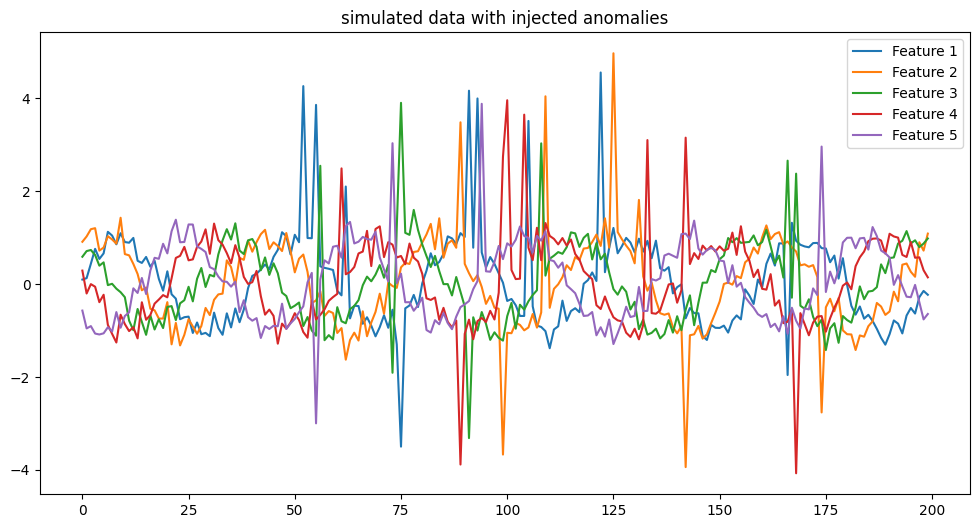

In [17]:
simulator=data_simulator(n_samples=200, n_features=5)
data=simulator.simulating_emissions_data()
simulator.visualizing_series(data)

In [19]:
preprocessor = preprocessing(data)
data_scaled = preprocessor.scaling()
X = preprocessor.create_seq(data_scaled, seq_len=32)

In [21]:
instance=data_loader(X)
loader=instance.loader()

In [22]:
X.shape

(168, 32, 5)

In [31]:
class LSTM_AE(nn.Module):
  def __init__(self, input_dim=5, hidden_dim=32, n_layers=1):
    super(LSTM_AE, self).__init__()
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers
    self.input_dim = input_dim
    # Encoder
    # the encoder : takes the input_dim and return the final hidden state
    self.encoder = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)

    # Decoder
    # the decoder : uses the final hidden state to recostruct the sequence
    self.decoder = nn.LSTM(hidden_dim, hidden_dim, n_layers, batch_first=True)
    self.output_layer = nn.Linear(hidden_dim, input_dim)


  def forward(self, x):
    batch_size, seq_len, _ = x.size()
    # the final hidden state is provided by the encoder and will serve as an initial input to the decoder
    _, (hidden, cell) = self.encoder(x)

    # the decoder's input sequence should have the same shape as the encoder's input (batch_size, seq_len, input_dim)
    # initial input to decoder: sequence of zeros
    decoder_input = torch.zeros(batch_size, seq_len, self.hidden_dim).to(x.device)
    decoded_output, _ = self.decoder(decoder_input, (hidden, cell))
    reconstructed = self.output_layer(decoded_output)

    return reconstructed

In [37]:
import matplotlib.pyplot as plt
import torch

class training_loop():
    def __init__(self, model, criterion, optimizer, loader, device='cpu'):
        self.model = model.to(device)
        self.criterion = criterion
        self.optimizer = optimizer
        self.loader = loader
        self.device = device

    def training(self, epochs):
        history = {'loss': []}
        for epoch in range(epochs):
            epoch_loss = 0
            self.model.train()
            for batch in self.loader:
                x = batch[0].to(self.device)

                output = self.model(x)
                loss = self.criterion(output, x)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                epoch_loss += loss.item()

            avg_loss = epoch_loss / len(self.loader)
            history['loss'].append(avg_loss)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")

        plt.plot(history['loss'], label='Training Loss')
        plt.title('Model Loss Evolution')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

Epoch 1/20, Loss: 0.313189
Epoch 2/20, Loss: 0.275874
Epoch 3/20, Loss: 0.240207
Epoch 4/20, Loss: 0.200843
Epoch 5/20, Loss: 0.152272
Epoch 6/20, Loss: 0.091065
Epoch 7/20, Loss: 0.040427
Epoch 8/20, Loss: 0.032817
Epoch 9/20, Loss: 0.019347
Epoch 10/20, Loss: 0.018638
Epoch 11/20, Loss: 0.017378
Epoch 12/20, Loss: 0.017695
Epoch 13/20, Loss: 0.016713
Epoch 14/20, Loss: 0.016645
Epoch 15/20, Loss: 0.016447
Epoch 16/20, Loss: 0.016276
Epoch 17/20, Loss: 0.016260
Epoch 18/20, Loss: 0.016181
Epoch 19/20, Loss: 0.016052
Epoch 20/20, Loss: 0.016167


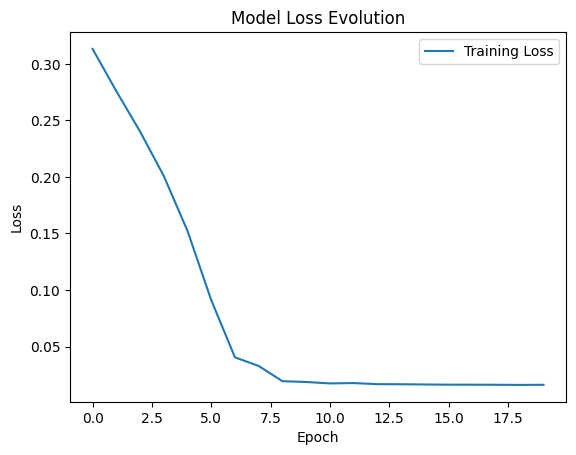

In [38]:
model = LSTM_AE(input_dim=5, hidden_dim=32, n_layers=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
trainner = training_loop(model, criterion, optimizer, loader, device='cpu')
trainner.training(20)

---

### 2. AI-Based Imputation of Missing Emissions Data 💧

**Scenario:** Our datasets have missing values. We need sophisticated imputation.

**Tasks:**
* **Implement Advanced Imputation:** Simple mean/median isn't enough. **Implement `sklearn.impute.IterativeImputer`** on a sample dataset (create one with missing values).
* **Design (GAN):** While not coding a full GAN, **sketch the `PyTorch`/`TensorFlow` architecture** for a `Generator` and `Discriminator` suitable for generating synthetic *tabular* emissions data. Highlight the key layers and activation functions.
* **Validate:** Explain how you'd validate the quality of imputed data (e.g., distribution checks, downstream model performance).
**Code Sample (Python `sklearn` - Needs Advanced Approach!):**

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer

# Sample data with missing values
X = np.array([[10., 2., 30.], [4., np.nan, 60.], [np.nan, 8., 90.], [10., 5., np.nan]])

# PROBLEM: Simple imputation doesn't capture relationships.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
print("Simple Imputed:\n", X_imputed)

# TASK: Implement IterativeImputer here & design a GAN architecture.
# Our Take: We need imputation that understands data relationships. Show us
# `IterativeImputer` in action and a blueprint for a GAN.

Simple Imputed:
 [[10.  2. 30.]
 [ 4.  5. 60.]
 [ 8.  8. 90.]
 [10.  5. 60.]]


# TASK 2 : Resolution

Ressources

[A Comparative Study of Missing Data Imputation Methods for Activity Recognition Task](https://www.researchgate.net/publication/367971475_A_Comparative_Study_of_Missing_Data_Imputation_Methods_for_Activity_Recognition_Task)

[Imputation Techniques](https://www.analyticsvidhya.com/blog/2022/02/imputation-techniques/)

[Handling Missing Data with IterativeImputer in Scikit-learn](https://www.geeksforgeeks.org/handling-missing-data-with-iterativeimputer-in-scikit-learn/)

**Implementation**

In [40]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [41]:
# Sample data with missing values
X = np.array([[10., 2., 30.], [4., np.nan, 60.], [np.nan, 8., 90.], [10., 5., np.nan]])
X

array([[10.,  2., 30.],
       [ 4., nan, 60.],
       [nan,  8., 90.],
       [10.,  5., nan]])

In [42]:
iterative_imp = IterativeImputer()
X_imputed = iterative_imp.fit_transform(X)
print("Iterative Imputed:\n", X_imputed)

Iterative Imputed:
 [[10.          2.         30.        ]
 [ 4.          5.00001993 60.        ]
 [ 7.88049082  8.         90.        ]
 [10.          5.         60.00004274]]


**Design**

Blueprint – GAN for tabular emissions data

Generator :    

  Params : Random noise vector z ∈ ℝ^32

  Return : Emissions vector ∈ ℝ^n (n = number of emissions features)

Discriminator :  

  Params : Real or generated emissions data ∈ ℝ^n

  Return : Probability that the input is real.

Example :    

Generator Architecture

| Layer Name       | Standard GAN Structure                     | Adaptation for Tabular Emissions Data           |
|------------------|--------------------------------------------|--------------------------------------------------|
| Input Layer      | Linear(noise_dim → hidden_dim)             | Linear(32 → 128) — noise vector z ∈ ℝ^32         |
| Activation 1     | ReLU                                       | ReLU — introduces non-linearity                 |
| Batch Norm       | BatchNorm1d(hidden_dim)                    | BatchNorm1d(128) — stabilizes learning           |
| Hidden Layer 2   | Linear(hidden_dim → smaller_hidden)        | Linear(128 → 64) — reduce dimensionality         |
| Activation 2     | ReLU                                       | ReLU — keep non-linearity                       |
| Output Layer     | Linear(smaller_hidden → data_dim)          | Linear(64 → n) — output = vector       |
| Output Activation| Tanh / Sigmoid / None                      | Tanh (for [-1,1]) or Sigmoid (for [0,1])         |

Discriminator Architecture

| Layer Name       | Standard GAN Structure                     | Adaptation for Tabular Emissions Data           |
|------------------|--------------------------------------------|--------------------------------------------------|
| Input Layer      | Linear(data_dim → hidden_dim)              | Linear(n → 64) — input = vector         |
| Activation 1     | LeakyReLU(0.2)                             | LeakyReLU(0.2) — avoids dead neurons             |
| Regularization   | Dropout(p=0.3)                             | Dropout(0.3) — combats overfitting               |
| Hidden Layer 2   | Linear(hidden_dim → smaller_hidden)        | Linear(64 → 32) — compresses features            |
| Activation 2     | LeakyReLU(0.2)                             | LeakyReLU(0.2) — keeps gradients flowing         |
| Output Layer     | Linear(smaller_hidden → 1)                 | Linear(32 → 1) — output = real/fake probability  |
| Output Activation| Sigmoid                                    | Sigmoid — maps to [0, 1]                         |


**Discussion :**
Explain how you'd validate the quality of imputed data (e.g., distribution checks, downstream model performance)

In order to ensure the quality and reliability of imputed data, I use a combination of quantitative and distributional validation techniques. These methods help assess whether the imputation model is learning realistic patterns and preserving the original data structure.

1.   Masking known values

The main idea is to hide known (non-missing) values in the dataset to simulate missingness. These artificially masked values are then imputed using the same technique, and then we apply a comparison between the imputed values to the original ones.

Purpose: Evaluate the imputation model's predictive accuracy on known ground truth.

2.   Distribution checks

I compare the distribution of imputed values against the distribution of observed (non-missing) values for each feature. This ensures the imputation process doesn't introduce unrealistic patterns.

Purpose : Imputed values should resemble the true distribution (same shape, range, central tendency)

---

### 3. Feature Engineering Automation 🛠️

**Scenario:** We need engineered features (rolling means, ratios) for better anomaly detection.

**Tasks:**
* **Implement Feature Functions:** Write `pandas` functions to create:

 1) 7-day rolling averages of emissions.

 2) Emission intensity (emissions / production_volume).

 3) Day-of-week/Month features.
* **Implement Feature Selection:** Add a step using `sklearn.feature_selection.SelectKBest` or `RFE` to **choose the most important features** based on a (simulated) target variable.
* **Validate:** Explain how you'd use `SHAP` to validate the importance of your engineered features *after* training a simple model (e.g., `RandomForestRegressor`).
**Code Sample (Python `pandas` - Needs More Features & Selection!):*

In [ ]:
import pandas as pd

def basic_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # PROBLEM: Only basic time features. Needs rolling stats, ratios, etc.
    df['hour'] = df['timestamp'].dt.hour
    return df

# df = pd.DataFrame({'timestamp': pd.to_datetime(['2024-01-01', '2024-01-02']),
#                    'emissions': [100, 110], 'production': [50, 55]})
# TASK: Add rolling mean, intensity, and feature selection steps.
# Our Take: Raw data isn't enough. Show us how you'd engineer insightful
# features and select the best ones.

# TASK 3 : Resolution

In [55]:
import pandas as pd
from sklearn.feature_selection import SelectKBest,f_regression

df = pd.DataFrame({'timestamp': pd.to_datetime(['2024-01-01', '2024-01-02']),
                   'emissions': [100, 110],
                   'production': [50, 55]})

class feature_functions():
  def __init__(self, df):
    self.df=df

  def basic_features(self):
    # PROBLEM: Only basic time features. Needs rolling stats, ratios, etc.
    self.df['timestamp'] = pd.to_datetime(df['timestamp'])
    self.df['hour'] = df['timestamp'].dt.hour
    self.df['day_of_week'] = df['timestamp'].dt.dayofweek
    self.df['month'] = df['timestamp'].dt.month


  def rolling_mean(self):
    # all data must be sorted by timestamp
    self.df = self.df.sort_values('timestamp')
    self.df['7_day_rolling_mean'] = self.df['emissions'].rolling(window=7, min_periods=1).mean()


  def intensity(self):
    self.df['intensity'] = self.df['emissions'] / self.df['production']

  def transform(self):
    self.basic_features()
    self.rolling_mean()
    self.intensity()
    return self.df

In [56]:
feature_generator = feature_functions(df)
new_df = feature_generator.transform()
new_df

,timestamp,emissions,production,hour,day_of_week,month,7_day_rolling_mean,intensity
0,2024-01-01,100,50,0,0,1,100.0,2.0
1,2024-01-02,110,55,0,1,1,105.0,2.0


In [57]:
class feature_selection(feature_functions):
    def __init__(self, df):
        super().__init__(df)
        self.X = None
        self.y = None
        self.selected_features = None

    def simulate_target(self, noise_std=3):
        import numpy as np
        np.random.seed(42)
        self.y = self.df['emissions'] + np.random.normal(0, noise_std, size=len(self.df))

    def select_features(self, k=3):
        from sklearn.feature_selection import SelectKBest, f_regression
        self.X = self.df.drop(columns=['timestamp', 'emissions'])
        selector = SelectKBest(score_func=f_regression, k=k)
        selector.fit(self.X, self.y)
        self.selected_features = self.X.columns[selector.get_support()]
        return list(self.selected_features)

    def run(self, k=3):
        self.transform()
        self.simulate_target()
        best_feats = self.select_features(k)
        return self.df, best_feats

In [61]:
fs = feature_selection(df)
df_with_features, selected_features = fs.run(k=3)

print("Selected features:", selected_features)

Selected features: ['month', '7_day_rolling_mean', 'intensity']


**Discussion :** Explain how you'd use SHAP to validate the importance of your engineered features after training a simple model (e.g., RandomForestRegressor)

Feature selection methods like SelectKBest rely on univariate statistics and don’t always capture complex feature interactions or nonlinear effects. and that’s where SHAP comes in to explain the contribution of each feature to individual predictions and overall model behavior.

Validation engineered features process :

  1. Train a baseline model

  Using the engineered features as input, we train a RandomForestRegressor (or any tree-based model).

  This model captures nonlinearities and feature interactions, unlike simpler selection stats.

  2. Compute SHAP values

  SHAP values quantify how much each feature pushes the prediction above or below the average prediction, on a per-sample basis.

  3. Global feature importance from SHAP

  Aggregating absolute SHAP values across the dataset to get a global ranking of features by importance.

  This gives a nuanced view of which features truly influence the model predictions, beyond simple correlation.

  4. Compare the results to the initial feature selection

  Check if features selected by SelectKBest correspond to those with high SHAP importance.

  If a feature was selected but has near-zero SHAP impact, it might be less useful in practice.

  But, if SHAP highlights a feature you missed, consider adding it back or engineering it differently.

  5. Validating anomalies and edge cases

  SHAP can explain why the model makes certain predictions on unusual samples, helping detect if engineered features behave as expected or cause bias.

---

### 4. Modular AI-Augmented LCA Model ♻️

**Scenario:** We're building an AI-enhanced Life Cycle Assessment (LCA) model.

**Tasks:**
* **Refactor to Modules:** The `Python` class below is monolithic. **Refactor it into separate classes** (`DataIngestor`, `EmissionFactorMapper`, `SupplyChainModel`, `ImpactCalculator`, `UncertaintyAnalyzer`).
* **Implement Uncertainty:** Add a basic **Monte Carlo simulation** method to the `UncertaintyAnalyzer` class to estimate the range of potential LCA results, given uncertainty ranges for emission factors.
* **Design:** Explain how AI (e.g., NLP for factor extraction, GNNs for supply chains) could enhance each module.
**Code Sample (Python Class - Needs Refactoring & Monte Carlo!):*

In [ ]:
import random

class MonolithicLCA:
    def __init__(self, product_data):
        self.data = product_data
        # PROBLEM: All logic is crammed here - ingestion, mapping, calculation...
        self.factors = {'steel': 2.1, 'transport': 0.15}

    def run_lca(self):
        steel_emissions = self.data['steel_kg'] * self.factors['steel']
        transport_emissions = self.data['transport_km'] * self.factors['transport']
        total = steel_emissions + transport_emissions
        # PROBLEM: No modularity, no uncertainty handling.
        print(f"Total Emissions: {total} tCO2e")
        return total

# data = {'steel_kg': 1000, 'transport_km': 500}
# lca = MonolithicLCA(data); lca.run_lca()
# Our Take: A complex LCA needs modularity. Refactor this and add uncertainty analysis.

# TASK 4 : Resolution

ressources :    
[LCA](https://ecochain.com/blog/life-cycle-assessment-lca-guide/)


[Integration of TIMES and life cycle assessment (LCA) models](https://www.bluecourses.com/asset-v1:bluecourses+BC3+October2019+type@asset+block/BartBaesensDataPreprocessingFeatureEng.pdf)

[Improving the Process of Product Design in a Phase of Life
Cycle Assessment (LCA) ](https://www.researchgate.net/figure/Concept-of-implementing-the-model-in-product-life-cycle-assessment-LCA-stages-Own_fig3_373497214)

**Discussion:**

The followed pipeline and the main purpose of each class :    

Based on the ressources i checked,

the `data ingestor` representes the first phase :

It is the responsible for handling the input data required for the LCA defining what exactly we want to analyze.

It manages the collection, validation, and structuring of raw data related to the product, such as material quantities, transport distances, or energy use, it provides the essential data foundation upon which subsequent analyses and calculations are built.

the `EmissionFactorMapper` :    

It manages to convert each imput data related to the product/service into an equivelant value of co2 emission or any other specified factor.

the `SupplyChainModel` :

It represents the diferent phases of the product system/its life cycle structure.
It provides the basis of attributing impacts per stage, i didn't call it in the other functions but it can help to get more insights by a multi-stage comparision or other further analysis.


the `ImpactCalculator` :  

It performs a classic LCA calculation, It retrieves quantities from the DataIngestor and maps them through the EmissionFactorMapper and do the multiplication to return the estimated carbon footprint of the product.

The current implementation only calculates total emissions, more advanced approaches found in the literature integrate multi-criteria evaluations to better reflect the product's overall sustainability.

In such frameworks, the goal is to compute a global score (e.g., QE) that combines:

a. a quality score of the product (durability, performance, lifespan, etc.)

b. an environmental impact score, which is typically normalized so that lower emissions yield higher scores.

A commonly used method is the **Weighted Sum Model (WSM)**, which computes:

$$
QE = w_1 \cdot \text{Quality Score} + w_2 \cdot (1 - \text{Normalized Emissions})
$$

Where:

- \( w1 \) and \( w2 \) are the weights assigned to each criterion,
- The environmental impact is inverted and normalized to fit the logic of “the higher the better”.

This allows balancing technical performance and environmental responsibility in a single composite score.


the `UncertintyAnalyzer` :    

Its goal is to estimate the variability of total emissions, rather than a single-point result.


Given the uncertainty ranges for emission factors, it simulates thousands of scenarios.


The choosen method : classic method following a log-normal distribution.

In such cases, the log-normal distribution is the most realistic.


Known that the different variables are always positive (quantities, distances, durations/time) and extreme values are recurrent we will asume that the present value in the provided data represent the mean value and we will apply the log-normal monte carlo method for this case.

And rather than using a single uncertainty percentage globally, a specific defenition of the uncertainty level for each variable via a dictionary is more suitable.

Each emission factor is simulated using:

$$
\mu_{\log} = \log(\mu) - \frac{\sigma^2}{2}
$$

$$
X \sim \text{LogNormal}(\mu_{\log}, \sigma)
$$

`σ` is defined per variable in the uncertainties dictionary (e.g. {'steel_kg': 0.1})

`X` is the simulated emission factor.

- We generate \( n \) random simulations using the same log-normal distribution for each variable.
- For each iteration, we compute a total emission value by multiplying the simulated emission factors with their corresponding quantities.
- We finally calculate:
  - the **mean** of all simulations,
  - the **min and max** values,
  - and the **confidence interval** (typically 95%) around the estimated result

In [16]:
import random
import numpy as np
import scipy.stats as st

class DataIngestor:
    def __init__(self, **kwargs):
        self.data = kwargs

    def get_data(self):
        return self.data

class EmissionFactorMapper:
    def __init__(self, **kwargs):
        self.factors = {'steel': 2.1, 'transport': 0.15}
        self.factors.update(kwargs)

    def get_factors(self, key):
        return self.factors.get(key, 0)

class SupplyChainModel:
    def __init__(self):
        self.stages = ['Raw-material-extraction', 'Manufacture', 'Transportation', 'Usage', 'End-of-Life']
        self.impact_by_stage = {}

    def add_impact(self, stage, impact):
        self.impact_by_stage[stage] = impact

    def total_impact(self):
        return sum(self.impact_by_stage.values())

class ImpactCalculator:
    def __init__(self, data_ingestor, factor_mapper):
        self.data = data_ingestor.get_data()
        self.mapper = factor_mapper

    def compute_total_emissions(self):
        total = 0
        for key, value in self.data.items():
            factor = self.mapper.get_factor(key,0)
            total += value * factor
        print(f"Total Emissions: {total:.2f} CO2")
        return total

class UncertaintyAnalyzer:
  def __init__(self, data, factors, uncertainty_percentage=0.1, uncertainties=None):
    self.data=data
    self.factors=factors
    self.uncertainty_percentage=uncertainty_percentage
    self.uncertainties=uncertainties

  def classic_monte_carlo_sim(self, n_iter=1000, confidence_level=0.95):
    results=[]
    for i in range (n_iter):
      total=0
      for key,quantity in self.data.items():
        base=self.factors.get(key,0)
        sigma=self.uncertainties[key]
        if base <= 0:
          return 0
        else :
          mu=np.log(base)-sigma**2/2
          simulated_factor = np.random.lognormal(mean=mu, sigma=sigma)
        total += quantity*simulated_factor
      results.append(total)

    results = np.array(results)
    min_val,max_val=np.min(results),np.max(results)
    mean=np.mean(results)

    # [mean−q∗(std/sqrt(n)), mean+q∗(std/sqrt(n))]
    sem = st.sem(results)
    margin = sem * st.t.ppf((1+confidence_level) / 2, n_iter-1)
    ic_lower = mean - margin
    ic_upper = mean + margin

    return mean, min_val, max_val, (ic_lower,ic_upper)

In [31]:
data = {'steel_kg': 1000, 'transport_km': 500}
factors = {'steel_kg': 2.1, 'transport_km': 0.15}
uncertainties = {'steel_kg': 0.1, 'transport_km': 0.2}

analyzer = UncertaintyAnalyzer(data, factors, uncertainties=uncertainties)
mean, min_val, max_val, ic = analyzer.classic_monte_carlo_sim()

print("Monte Carlo Simulation Results:")
print(f"Mean emissions: {mean:.2f} CO2, Min: {min_val:.2f} CO2, Max: {max_val:.2f} CO2")
print(f"95% CI: [{ic[0]:.2f}, {ic[1]:.2f}]")

Monte Carlo Simulation Results:
Mean emissions: 2180.24 CO2, Min: 1594.22 CO2, Max: 2947.02 CO2
95% CI: [2167.55, 2192.93]


**Desing/Discussion**

Explain how AI (e.g., NLP for factor extraction, GNNs for supply chains) could enhance each module.

**`DataIngestor` module :**    

The usage of NLP can outperforms and enhance the DataIngestor module, most raw data is extracted from unstructures sources such as reports, PDFs etc and manual extraction to a larger scale can be more time-consuming and error-prone.

For that cas the integration of NLP techniques such as NER and pattern matching to extract the required/relevant entities like the material types or the quantities maybe also the integration of llm to match the entities with some contextual key words and generate an exploitable format gathering the product information enhance the actual functionning.

**`EmissionFactorMapper` module :**  

For the EmissionFactorMapper, emission factors are often buried in external databases, a semantic similarity models to match a product description to an emission factor database entry can be helpful.

**`supplyChainModel` module :**  


GNNs can significantly enhance the supplyChainModel, the actual model assume a linear fixed stages of the supply chaine or real word cases form complex, multi-node network with dependencies.

Model the entire supply chain as a graph:

**nodes** = materials, processes, or locations

**edges** = transport, transformation, or economic flows

GNNs allow reasoning over graph structure to:

* detect hotspots,

* model propagation of impacts,

* simulate effects of disruption.

**`ImpactCalculator` module :**

One of the methods used for the Impact calculations is the multi-criteria decision making, and the weights for the wsm are often arbitrary or expert-defined. We can integrate a ML based solution:

Use historical decision data or expert preferences to infer optimal weights automatically,

These weights can be learned from past decisions using regression, graph-based learning.

**`UncertaintyAnalyzer` module :**

Finally for the UncertaintyAnalyzer, as we mentionned earlier, uncertainty percentages are often context-dependent.

solution we can use a Bayesian Neural Networks to model uncertainty as a distribution over predictions, to learn uncertainty levels from historical variability.

This approach allows the system to learn and adapt uncertainty levels from historical variability, enabling more robust reasoning that reflects the true behavior of the data under diverse conditions.

---

### 5. Reinforcement Learning for Decarbonization 🤖

**Scenario:** We want to use RL to recommend cost-effective decarbonization actions.

**Tasks:**
* **Define the RL Problem:** Formalize states, actions, and rewards for this scenario.
* **Fix the Environment:** The `Gymnasium` environment below is incomplete. **Fix the `step` method** to correctly update the state and calculate a meaningful reward (e.g., `reward = emission_reduction - action_cost`). **Fix the `reset` method.**
* **Implement Training:** Write a *basic* training loop using `Stable-Baselines3` (e.g., `PPO`) to train an agent on your fixed environment.
**Code Sample (`Gymnasium`/Python - Needs Fixing!):*

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class DecarbEnv(gym.Env):
    def __init__(self):
        super(DecarbEnv, self).__init__()
        # Actions: 0=Invest Renewables, 1=Improve Efficiency, 2=Do Nothing
        self.action_space = spaces.Discrete(3)
        # State: [CurrentEmissions, BudgetRemaining]
        self.observation_space = spaces.Box(low=0, high=1000, shape=(2,), dtype=np.float32)
        self.state = [1000, 500]

    def step(self, action):
        emissions, budget = self.state
        # PROBLEM 1: Reward logic is missing/trivial.
        # PROBLEM 2: State update logic is missing.
        # PROBLEM 3: `terminated` and `truncated` logic is missing.
        reward = -1
        terminated = budget <= 0
        truncated = False
        info = {}
        return np.array(self.state), reward, terminated, truncated, info

    def reset(self, seed=None, options=None):
        # PROBLEM 4: Doesn't properly reset state.
        self.state = [1000, 500]
        return np.array(self.state), {}

# TASK: Fix `step` and `reset`, then write a basic Stable-Baselines3 training script.
# Our Take: RL is powerful but needs a well-defined environment. Fix this one
# and show us how to start training an agent.

# Task 5 : Resolution  

**Discussion:**

In [5]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

Actions={
    0:"Invest_Renewables",
    1:"Improve_Efficiency",
    2:"Do_Nothing"}

# State=[1000,500] # [CurrentEmissions, BudgetRemaining]
# Rewards=[]

class DecarbEnv(gym.Env):
    def __init__(self):
        super(DecarbEnv, self).__init__()
        self.max_emissions = 1000
        self.max_budget = 500
        self.emission_step = 100
        self.budget_step = 50
        # The +1 to include the state 0
        self.emission_levels = self.max_emissions // self.emission_step + 1
        self.budget_levels = self.max_budget // self.budget_step + 1
        # Actions: 0=Invest Renewables, 1=Improve Efficiency, 2=Do Nothing
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Discrete(self.emission_levels * self.budget_levels)

        self.state = (10, 10)
        self.action_names = list(Actions.values())

    """
    Q[state_index, action] and my environement state is (emission_level, budget_level) 2 independant dimensions
    we can not index a matrix with a tuple (emission_level, budget_level) so we will transform the state into a unique state_index
    state_index = CurrentEmissions * budget_levels + BudgetRemaining == emission_level * budget_levels + budget_level
    Q[state_index, action] indicates the estimated reward"""

    def get_state_index(self):
        e, b = self.state
        return e * self.budget_levels + b

    def set_state_from_values(self, emissions, budget):
        e = min(emissions // self.emission_step, self.emission_levels - 1)
        b = min(budget // self.budget_step, self.budget_levels - 1)
        self.state = (e, b)

    def step(self, action):
        e, b = self.state
        emissions = e * self.emission_step
        budget = b * self.budget_step

        reduction_table = [100, 50, 0]
        cost_table = [100, 50, 0]

        reduction = reduction_table[action]
        cost = cost_table[action]

        new_emissions = max(emissions - reduction, 0)
        new_budget = max(budget - cost, 0)
        self.set_state_from_values(new_emissions, new_budget)

        reward = reduction - 0.5 * cost
        terminated = new_emissions == 0 or new_budget == 0
        truncated = False

        info = {
            "state_before": (emissions, budget),
            "action_name": self.action_names[action],
            "reduction": reduction,
            "cost": cost,
            "state_after": (new_emissions, new_budget)
        }

        return self.get_state_index(), reward, terminated, truncated, info

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = (10, 10)
        return self.get_state_index(), {}

In [8]:
from itertools import product

class QLearningAgent:
    def __init__(self, env):
        self.env = env

    def q_learning(self, alpha, gamma, epsilon, n_steps, n_episodes):
        q_table = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        rewards_per_episode = []
        traces = []

        for episode in range(n_episodes):
            state, _ = self.env.reset()
            total_reward = 0
            path = []

            for step in range(n_steps):
                if np.random.rand() < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(q_table[state])

                next_state, reward, terminated, truncated, info = self.env.step(action)
                done = terminated or truncated

                # to ensure that the next_state is a valid index for the q_table
                if next_state >= self.env.observation_space.n:
                    print(f"Warning: next_state {next_state} is out of bounds for q_table size {self.env.observation_space.n}")
                    best_next_action = np.argmax(q_table[state]) # Fallback to current state if next_state is invalid
                else:
                    best_next_action = np.argmax(q_table[next_state])


                q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

                path.append((state, action, reward, next_state, info))

                state = next_state
                total_reward += reward

                if done:
                    break

            rewards_per_episode.append(total_reward)
            traces.append(path)

        return q_table, rewards_per_episode, traces

    def grid_search(self, alpha_list, gamma_list, epsilon_list, n_steps, n_episodes):
        best_score = -float("inf")
        best_params = None
        best_q_table = None

        for alpha, gamma, epsilon in product(alpha_list, gamma_list, epsilon_list):
            print(f"Testing alpha={alpha}, gamma={gamma}, epsilon={epsilon}") # for tracking
            q_table, rewards, _ = self.q_learning(alpha, gamma, epsilon, n_steps, n_episodes)
            # Calculate average reward over the last 100 episodes if available
            if len(rewards) >= 100:
                 avg_reward = np.mean(rewards[-100:])
            else:
                 avg_reward = np.mean(rewards) # Use all rewards if less than 100

            if avg_reward > best_score:
                best_score = avg_reward
                best_params = (alpha, gamma, epsilon)
                best_q_table = q_table
            print(f"Avg reward for these params: {avg_reward}") # Added print statement

        return best_q_table, best_params, best_score

In [10]:
env = DecarbEnv()
agent = QLearningAgent(env)

alpha_list = [0.1, 0.5]
gamma_list = [0.9, 0.95]
epsilon_list = [0.1, 0.2]
n_steps = 100
n_episodes = 500

best_q_table, best_params, best_score = agent.grid_search(alpha_list, gamma_list, epsilon_list, n_steps, n_episodes)

Testing alpha=0.1, gamma=0.9, epsilon=0.1
Avg reward for these params: 258.25
Testing alpha=0.1, gamma=0.9, epsilon=0.2
Avg reward for these params: 271.0
Testing alpha=0.1, gamma=0.95, epsilon=0.1
Avg reward for these params: 260.75
Testing alpha=0.1, gamma=0.95, epsilon=0.2
Avg reward for these params: 268.0
Testing alpha=0.5, gamma=0.9, epsilon=0.1
Avg reward for these params: 273.5
Testing alpha=0.5, gamma=0.9, epsilon=0.2
Avg reward for these params: 270.0
Testing alpha=0.5, gamma=0.95, epsilon=0.1
Avg reward for these params: 273.25
Testing alpha=0.5, gamma=0.95, epsilon=0.2
Avg reward for these params: 272.0


In [13]:
alpha, gamma, epsilon = best_params
q_table, rewards, traces = agent.q_learning(alpha, gamma, epsilon, n_steps, n_episodes)

---

### 6. Explainability for Audit-Ready AI 🔍

**Scenario:** Our anomaly detection model needs transparent, audit-proof explanations.

**Tasks:**
* **Implement `SHAP`:** Assume you have a trained tree-based model (e.g., `XGBoost` - simulate one or train a basic one). **Write `Python` code using the `shap` library** to:

 1) Create an `Explainer`.

 2) Calculate `SHAP` values for a few sample anomaly instances.

 3) **Generate a `shap.force_plot`** (you'll need to describe how you'd save/display it).

* **Explain:** How would you translate these `SHAP` values into human-readable explanations for an audit report?
**Code Sample (Python `SHAP` - Needs Implementation!):*

In [ ]:
import shap
import xgboost as xgb
import pandas as pd
import numpy as np

# Simulate a trained model and data
X_train = pd.DataFrame(np.random.rand(100, 5), columns=[f'feat_{i}' for i in range(5)])
y_train = pd.Series(np.random.rand(100) > 0.9) # Binary target (anomaly)
model = xgb.XGBClassifier().fit(X_train, y_train)
X_test_anomalies = X_train[y_train == 1].head(3)

# PROBLEM: Needs SHAP implementation.
# 1. Create a shap.Explainer (e.g., TreeExplainer)
# 2. Calculate shap_values for X_test_anomalies
# 3. Show how to generate a force_plot or summary_plot

print("SHAP values need to be calculated and plotted here.")
# Our Take: Black boxes won't work for audits. Show us how to use SHAP to
# explain our AI's decisions.

# TASK 6 : Resolution   

In [77]:
import shap
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SHAP_anomaly_explainer:

    def __init__(self, model=xgb.XGBClassifier()):
        # Simulate training data
        self.X_train = pd.DataFrame(np.random.rand(100, 5), columns=[f'feat_{i}' for i in range(5)])
        self.y_train = pd.Series(np.random.rand(100) > 0.9)  # Binary target (anomaly)
        self.model = model
        self.model.fit(self.X_train, self.y_train)

        anomalies = self.X_train[self.y_train == 1]
        self.X_anomalies = anomalies.head(min(3, len(anomalies)))

        if self.X_anomalies.empty:
            raise ValueError("No anomaly instances found for SHAP explanation.")

        # SHAP explainer
        self.explainer = shap.Explainer(self.model, self.X_train)
        self.explanations = self.explainer(self.X_anomalies)

    def plot_summary(self):

        """
        A global summary bar plot showing average SHAP values across anomaly instances.
        """
        shap.plots.bar(self.explanations)

    def plot_waterfall(self, instance_index=0):

        """
        A waterfall plot for an individual anomaly instance, to show how each feature contributed to the anomaly decision
        """
        shap.plots.waterfall(self.explanations[instance_index])

    def save_force_plot(self, instance_index=0, filename="shap_force_plot.html"):
        """
        Generate and save a SHAP force_plot (interactive HTML) for a single instance.
        """
        shap.initjs()
        force_plot = shap.plots.force(self.explanations[instance_index], matplotlib=False)
        shap.save_html(filename, force_plot)
        print(f"Force plot saved to {filename}")

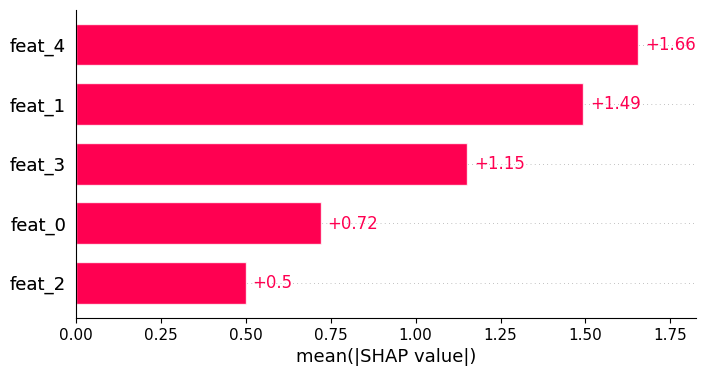

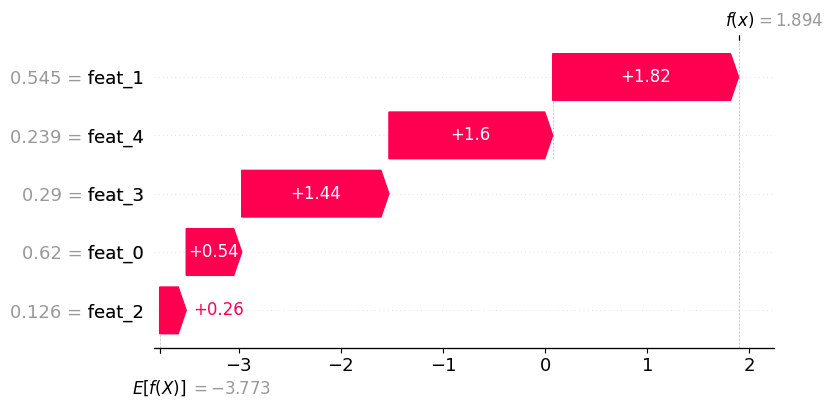

Force plot saved to shap_force_plot.html


In [78]:
    explainer = SHAP_anomaly_explainer()
    explainer.plot_summary()
    explainer.plot_waterfall(0)
    explainer.save_force_plot(0)

In [ ]:
# Our Take: Black boxes won't work for audits. Show us how to use SHAP to
# explain our AI's decisions.

The use of SHAP provides a mathematically grounded way to justify why specific inputs lead to anomaly detection.

Each prediction can be decomposed feature by feature, enabling traceable decision paths.

The plots clearly show which variables contributed most to a given anomaly classification—supporting compliance with fairness and explainability requirements.

**Discussion :**

Based on the SHAP summary analysis across the detected anomaly instances:

* feat_4 had the strongest average impact on the model's decision, increasing the anomaly score significantly (mean SHAP approximatly +1.66).

* feat_1 and feat_3 were also major contributors, with SHAP values of +1.49 and +1.15, respectively.

* Features like feat_0 and feat_2 had moderate influence (+0.72 and +0.50).

This suggests that anomalies are most likely associated with high or unusual values in feat_4, feat_1, and feat_3.

This waterfall plot explains the contribution of each feature for one specific anomaly instance. The model's expected value (baseline prediction) is adjusted feature-by-feature until the final output (f(x)) is reached.

For a specific anomaly instance:

The model starts from a baseline score of -3.77 (average model prediction).

The following features increased the anomaly score:

* feat_1 (+1.82)

* feat_4 (+1.60)

* feat_3 (+1.44)

* feat_0 (+0.54)

* feat_2 (+0.26)

This means the anomaly was driven by a combination of high values in feat_1, feat_4, and feat_3, which had a substantial additive impact.

---

### 12. Addressing Class Imbalance ⚖️

**Scenario:** Anomalies are rare, making our models biased.

**Tasks:**
* **Implement `SMOTE`:** The `scikit-learn` script below trains on imbalanced data. **Add a step using `imbalanced-learn`'s `SMOTE`** to oversample the minority class *before* training.
* **Compare Metrics:** Explain why `Accuracy` is a bad metric here and why `Precision-Recall` or `F1` are better. Calculate these metrics *before* and *after* `SMOTE`.
**Code Sample (Python `sklearn` - Needs `SMOTE`!):*

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PROBLEM: Trains on imbalanced data.
# TASK: Insert SMOTE here (from imblearn.over_sampling import SMOTE)
#       sm = SMOTE(); X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
#       Then train on X_train_sm, y_train_sm.

model = LogisticRegression(); model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy (Before SMOTE): {accuracy_score(y_test, y_pred)}")
print(f"F1 Score (Before SMOTE): {f1_score(y_test, y_pred)}") # Likely poor.
# Our Take: Imbalance plagues anomaly detection. Show us a standard technique to fix it.

# TASK 12 : Resolution

In [81]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# before SMOTE
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Before SMOTE")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")


sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# after SMOTE
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = model_sm.predict(X_test)

print("\n After SMOTE ")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_sm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_sm):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_sm):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_sm):.4f}")


 Before SMOTE
Accuracy:  0.9367
Precision: 0.6000
Recall:    0.1500
F1 Score:  0.2400

 After SMOTE 
Accuracy:  0.8767
Precision: 0.3191
Recall:    0.7500
F1 Score:  0.4478


**Discussion :**

For the imbalanced data senarios, Accuracy fails to mesure the performance of the classification model like for the anomaly detection.

For our context :     
* 95% of your data are normal cases (class 0)

* 5% are anomalies (class 1)

-> The dataset is highly imbalanced

So if the model always predicts 0, it’s correct 95% of the time, that’s 95% accuracy, even though it fails completely at detecting anomalies.

Accuracy negligate the impact of the minority class in imbalanced data.

Befor SMOTE :     
The model was able to guess normal cases, but fails to detect most anomalies.

  * Only 15% of actual anomalies were caught
  * F1 Score:  0.2400  = poor balance between precision and recall


After SMOTE :   

Although accuracy dropped slightly, but the model is now much more relevant: it detects most anomalies and does so with acceptable precision.

| Metric        | What It Measures                                          | Why It Matters in Anomaly Detection                  |
| ------------- | --------------------------------------------------------- | ---------------------------------------------------- |
| **Precision** | % of predicted anomalies that are actually true anomalies | Helps avoid false alarms (false positives)           |
| **Recall**    | % of actual anomalies the model successfully detected     | Helps ensure real anomalies are not missed           |
| **F1 Score**  | Harmonic mean of precision and recall                     | Balances both objectives when classes are imbalanced |

Recap :     

In imbalanced anomaly detection, we care more about detecting the rare cases (recall) than about getting the majority (normal cases) right.
Metrics like F1 Score and Recall give a more honest and useful picture than Accuracy.

---

### 15. Scenario Simulation for Decarbonization 🎲

**Scenario:** Clients want to simulate "what-if" decarbonization scenarios.

**Tasks:** **Implement Monte Carlo Simulation.** The `Python` script simulates a *single* scenario. **Enhance it to run a Monte Carlo simulation (e.g., 1000 runs)** where `cost_reduction` and `emission_cut` have a defined *distribution* (e.g., normal distribution using `numpy.random.normal`) instead of being fixed. Collect and plot a histogram of the final `net_benefit`.
**Code Sample (Python - Needs Monte Carlo!):**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_scenario(investment):
    # PROBLEM: Deterministic, no uncertainty.
    cost_reduction_factor = 0.1
    emission_cut_factor = 0.05
    emission_value = 50 # Value per ton cut

    cost_reduction = investment * cost_reduction_factor
    emission_cut = investment * emission_cut_factor
    net_benefit = (emission_cut * emission_value) - (investment - cost_reduction)
    return net_benefit

investment = 100000
print(f"Single Run Benefit: {simulate_scenario(investment)}")
# TASK: Run this 1000 times, varying factors with np.random.normal. Plot a histogram.
# Our Take: Decisions need uncertainty analysis. Add Monte Carlo to this simulation.

Single Run Benefit: 160000.0


# TASK 15 : Resolution

In [99]:
import numpy as np
import matplotlib.pyplot as plt

class decarbonization_scenarios:
  def __init__(self,investment, emission_value=50):
    self.investment=investment
    self.emission_value=emission_value

    #cost_reduction -> N(0.1,0.02)
    #emission_cut   -> N(0.05,0.01)

    self.cost_reduction_mu = 0.1
    self.cost_reduction_sigma = 0.02
    self.emission_cut_mu = 0.05
    self.emission_cut_sigma = 0.01


  def mc_simulate_scenario(self,n_iter):
    net_benefits = []

    for i in range(n_iter):
      #boxmuller
      cost_reduction_sample = np.random.normal(self.cost_reduction_mu, self.cost_reduction_sigma)
      emission_cut_sample = np.random.normal(self.emission_cut_mu, self.emission_cut_sigma)

      cost_reduction = self.investment * cost_reduction_sample
      emission_cut = self.investment * emission_cut_sample
      net_benefit = (emission_cut * self.emission_value) - (self.investment - cost_reduction)
      net_benefits.append(net_benefit)

    return net_benefits

  def mc_results(self, net_benefits, confidence_level=0.95, n_iter=1000):
    mean_net_benefit = np.mean(net_benefits)
    min_val, max_val = np.min(net_benefits), np.max(net_benefits)
    sem = st.sem(net_benefits)
    margin = sem * st.t.ppf((1 + confidence_level) / 2, n_iter - 1)

    ic_lower = mean_net_benefit - margin
    ic_upper = mean_net_benefit + margin

    return mean_net_benefit, min_val, max_val, (ic_lower, ic_upper)


  def plots(self,net_benefits):
    mean, min_val, max_val, ic = self.mc_results(net_benefits)
    ic_lower, ic_upper = ic

    plt.hist(net_benefits, bins=30, color="lightgreen", edgecolor="black")
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.0f}')
    plt.axvline(ic_lower, color='blue', linestyle='dotted', linewidth=2, label=f'95% CI Lower = {ic_lower:.0f}')
    plt.axvline(ic_upper, color='blue', linestyle='dotted', linewidth=2, label=f'95% CI Upper = {ic_upper:.0f}')

    plt.tight_layout()
    plt.xlabel('Net Benefit')
    plt.ylabel('Frequency')
    plt.title('Distribution of Net Benefits')
    plt.legend()
    plt.grid(True)
    plt.show()

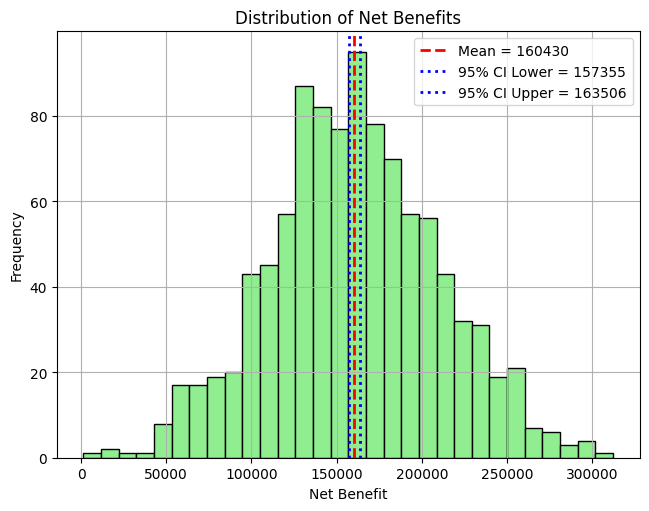

In [100]:
investment = 100000
n_iter=1000

# TASK: Run this 1000 times, varying factors with np.random.normal. Plot a histogram.

simulator=decarbonization_scenarios(investment)
net_benefits=simulator.mc_simulate_scenario(n_iter)
#simulations
simulator.plots(net_benefits)

In [68]:
mean, min_val, max_val, ic = simulator.mc_results(net_benefits)
print("Monte Carlo Simulation Results:")
print(f"Net Benefit – {n_iter} runs:")
print(f"Mean : {mean:.2f}$, Min: {min_val:.2f}$, Max: {max_val:.2f}$")
print(f"95% Confidence Interval: [{ic[0]:.2f}, {ic[1]:.2f}]")

Monte Carlo Simulation Results:
Net Benefit – 1000 runs:
Mean : 160195.90$, Min: 17014.08$, Max: 323404.74$
95% Confidence Interval: [157093.49, 163298.31]


---

### 16. Comprehensive AI Documentation & Model Cards 📖

**Scenario:** We need excellent docs for our AI models.

**Tasks:** **Write Docstrings & a Model Card.**

The `Python` script has a model with *no* docstrings.

1) **Add comprehensive `NumPy`-style docstrings** to the `__init__` and `predict` methods.

2) **Create a `Markdown` file (`model_card.md`)** for this model, including sections like Model Details, Intended Use, Training Data, Evaluation Data, Metrics, Ethical Considerations, and Caveats.

**Code Sample (Python - Needs Docstrings!):**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

class EmissionPredictor:
    # PROBLEM: No docstrings!
    def __init__(self, n_estimators=100):
        self.model = RandomForestRegressor(n_estimators=n_estimators)

    def train(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# TASK: Add docstrings & create model_card.md.
# Our Take: Good docs & model cards are essential for transparency and teamwork.

# TASK 16: Resolution

In [84]:
from sklearn.ensemble import RandomForestRegressor

class EmissionPredictor:
  """
  __init__ () : is the class constructor, it's used to create an instance of the class.
  Inside it, a RandomForestRegressor model (a regression model) is instantiated.
  Each time an object of the class is created, a RandomForestRegressor model is automatically instantiated with the number of trees specified by n_estimators.
  This model is saved in self.model and can be used later for training and prediction.

  Parameters :
  n_estimators (int) : Specifies the number of trees in the forest (default = 100)
  """

  def __init__(self, n_estimators=100):

    self.model = RandomForestRegressor(n_estimators=n_estimators)

  def train(self, X, y):
    """
    Train() : the training instance method to train the model using the training set

    Parameters :
    X (dataFrame) : the training features
    y (dataFrame) : the known target values for the observations in the training set
    """
    self.model.fit(X, y)

  def predict(self, X):
    """
    predit() : the test instance method to predict the target values for the observations in the test set

    Parameters :
    X (dataFrame) : the test features

    Returns :
    float = The predicted target values for the observations in the test set
    """
    return self.model.predict(X)

In [83]:
emission_predictor = EmissionPredictor()
print(EmissionPredictor.__doc__)
print(emission_predictor.train.__doc__)
print(emission_predictor.predict.__doc__)


  __init__ () : is the class constructor, it's used to create an instance of the class.
  Inside it, a RandomForestRegressor model (a regression model) is instantiated.
  This model is saved in self.model and can be used later for training and prediction.
  Each time an object of the class is created, a RandomForestRegressor model is automatically instantiated with the number of trees specified by n_estimators.

  Parameters :
  n_estimators (int) : Specifies the number of trees in the forest (default = 100)
  

    Train() : the training instance method to train the model using the training set

    Parameters :
    X (dataFrame) : the training features
    y (dataFrame) : the known target values for the observations in the training set
    

    predit() : the test instance method to predict the target values for the observations in the test set

    Parameters :
    X (dataFrame) : the test features

    Returns :
    float = The predicted target values for the observations in the 

---

*(The following 4 questions are less code-intensive, focusing more on methodology, design, and experience.)*


---

This is your canvas, AI pioneer! We know it's challenging, but we believe it reflects the exciting work ahead. Show us your best thinking, your sharpest code, and your passion for using AI for good. We can't wait to see your solutions! Good luck!


### 17. Backend API Design for AI Models (Design)

**Scenario:** How should we expose our AI models (anomaly detection, prediction) via `REST APIs`?

**Tasks:** Design a `REST API` structure. Consider: What endpoints are needed? How should inputs (features) and outputs (predictions, explanations) be structured (`JSON`)? How should we handle asynchronous predictions for long-running models? How would you version these AI-specific APIs?

---

Proposed Endpoints :  

POST /api/v1/predict-anomaly

POST /api/v1/predict-risk

GET  /api/v1/prediction/{id}/status

GET  /api/v1/prediction/{id}/result

----

Input :

```
{
  "features": {
    "temperature": x,
    "voltage": y,
    "current": z,
    "timestamp": "t"
  },
  
  "metadata": {
    "source": "",
    "request_id": "a"
  }
}
```

----

Output :    

```
{
  "prediction": "anomaly",
  "confidence": 0.92,
  "shap_explanation": {
    "temperature": 0.37,
    "voltage": -0.12,
    "current": 0.63
  }
}
```




### 18. Backend Resilience for AI Inference (Design)

**Scenario:** Our AI inference service might fail due to model errors, resource limits, or transient issues.

**Tasks:** How would you design resilience? Implement `Python` pseudo-code (or use `tenacity`) for retries. Describe how `circuit breakers` would work here. How would you implement `graceful degradation` (e.g., falling back to a simpler model or default value if the main AI fails)?

### 19. Time Management Under Pressure (Experience)

**Scenario:** You have 4 hours for an AI model tuning challenge and get stuck.

**Tasks:** Describe your approach: How do you manage time, prioritize (which hyperparameter to tune first?), know when an approach isn't working, and save time for review/reporting? Share a real-world AI/ML example.


**Strategy: inspired from PDCA cycle**

1. 1 hour max for exploration.

2. Start simple: using a baseline model and notebook to validate pipeline.

3. Prioritize high-impact hyperparameters:

  Tree models: max_depth, n_estimators, learning_rate

  Neural nets: learning_rate, batch_size, hidden_units

4. Automate tuning with tools like Optuna or RandomizedSearchCV.

5. Save time for results: Final model, Evaluation metrics, Short report / visualizations (confusion matrix, ROC curve)

---

### 20. AI Problem Solving and Debugging (Experience)

**Scenario:** A production AI model's performance suddenly degrades (concept/data drift).

**Tasks:** Outline your debugging methodology: How do you identify drift (monitoring tools, statistical tests)? How do you trace the cause (input data changes? infrastructure? model itself?)? How do you reproduce, fix (retrain? rollback?), validate, and document the fix?


---

### 7. Embedding Domain Knowledge into AI 🧠

**Scenario:** We need our AI models to respect known regulations (e.g., emission caps).

**Tasks:**
* **Implement Post-Processing Constraints:** Take a (simulated) ML model's output (e.g., predicted emissions). **Write a `Python` function** that acts as a post-processing step: If the prediction exceeds a known `REGULATORY_CAP`, it should either cap the prediction at the limit *or* flag it as a high-priority "Regulatory Breach" anomaly, while also providing the original prediction.
* **Discuss:** How else could you embed this knowledge (feature engineering, hybrid models)? What are the pros/cons?
**Code Sample (Python - Needs Constraint Logic!):*

In [ ]:
REGULATORY_CAP = 500.0 # Example cap

def predict_emissions_ml(input_data):
    # Simulates an ML model prediction
    return random.uniform(450, 550)

def apply_domain_knowledge(prediction):
    # PROBLEM: Needs logic to check against REGULATORY_CAP and flag/cap.
    if prediction > REGULATORY_CAP:
        print(f"Potential Breach! Predicted: {prediction}, Cap: {REGULATORY_CAP}")
        # Return something structured here.
    return {"final_value": prediction, "breach_flag": False}

# Our Take: Pure ML can be naive. We need to ensure our AI respects
# real-world rules. Show us a simple way to enforce a constraint.

---

### 8. NLP Pipeline for Regulatory Document Parsing 📄

**Scenario:** We need to extract compliance rules (e.g., limits, reporting dates) from regulatory PDFs.

**Tasks:**
* **Implement `NER` with `Hugging Face`:** The `Python` script below sets up a basic `Hugging Face` pipeline. **Enhance it** to: 1) Use a specific, pre-trained `NER` model (e.g., `dslim/bert-base-NER`). 2) Process a sample text (provided). 3) **Extract and print entities** relevant to compliance (like `ORG`, `DATE`, and potentially custom ones if you describe how you'd fine-tune). 4) Add error handling.
**Code Sample (Python `Hugging Face` - Needs `NER` & Processing!):*

In [ ]:
from transformers import pipeline

# PROBLEM 1: Using a generic 'sentiment-analysis' pipeline. Needs NER.
# PROBLEM 2: Needs to process text and extract specific entities.
nlp_pipeline = pipeline("sentiment-analysis")

regulatory_text = """
Carbon Jar Inc. must report its Scope 1 emissions by March 31, 2026.
The limit for Sector B in Egypt is 50,000 tCO2e.
"""

def extract_compliance_rules(text):
    print("NLP pipeline needs to be configured for NER and run here.")
    # results = nlp_pipeline(text)
    # Filter and print ORG, DATE, and maybe numeric limits.
    return {}

# extract_compliance_rules(regulatory_text)
# Our Take: Regulatory docs are dense. Show us how to use Transformers to
# pull out the critical pieces automatically.

---

### 9. AI-Driven Generation of Compliance Reports 📝

**Scenario:** We need to auto-generate audit reports using AI-driven insights.

**Tasks:**
* **Build a `Jinja2` Report Generator:** The `Python` script uses `Jinja2` but has a basic template. **Enhance both the script and the template** to: 1) Include sections for *summary statistics*, *anomaly lists* (with explanations), and *regulatory references*. 2) Dynamically insert a simple `matplotlib` plot (save to base64 and embed).
**Code Sample (Python `Jinja2` - Needs Enhancing!):*

In [ ]:
from jinja2 import Environment, FileSystemLoader
import base64; from io import BytesIO; import matplotlib.pyplot as plt

env = Environment(loader=FileSystemLoader('.'))
template = env.from_string("""
<h1>Emissions Report: {{ month }}</h1>
<p>Total Emissions: {{ total_emissions }}</p>
""")

def generate_report(data):
    # Simulate a plot
    fig, ax = plt.subplots(); ax.bar(['A'], [data['total_emissions']]); buf = BytesIO()
    fig.savefig(buf, format='png'); buf.seek(0); img_b64 = base64.b64encode(buf.read()).decode('utf-8')

    # PROBLEM: Needs to pass plot data & anomaly details to template.
    html = template.render(month="Jan 2025", total_emissions=data['total_emissions'])
    with open("report.html", "w") as f: f.write(html)

# generate_report({'total_emissions': 12345, 'anomalies': [{'id':1, 'reason':'High'}]})
# Our Take: Reports need to be rich and dynamic. Enhance this generator.

---

### 10. MLOps: Production Deployment & Monitoring 🚢

**Scenario:** We need to deploy our AI models on K8s and monitor them.

**Tasks:**
* **Fix the `Seldon Core` Manifest:** The `YAML` below tries to deploy a model with `Seldon Core` but has **structural errors and missing monitoring setup**. **Fix the `YAML`** to correctly define a predictor, add basic resource requests/limits, and include annotations for `Prometheus` scraping.
* **Design Monitoring:** Explain how you'd implement data drift detection (conceptually or with pseudo-code).
**Code Sample (K8s `Seldon` YAML - Needs Fixing!):*
```yaml
apiVersion: machinelearning.seldon.io/v1
kind: SeldonDeployment
metadata:
  name: emission-anomaly-detector
spec:
  name: detector
  predictors:
    - componentSpecs:
        - spec:
            containers:
              - name: anomaly-model
                image: my-anomaly-model:0.1
                # PROBLEM 1: Missing resource requests/limits.
                # PROBLEM 2: Missing port definition.
      graph:
        name: anomaly-model
        type: MODEL
        endpoint:
          type: REST
      name: main-predictor
      replicas: 1
  # PROBLEM 3: Missing annotations/setup for Prometheus monitoring.
```
**Our Take:** Deploying models is just the start. We need robust, monitored deployments. Fix this manifest.

---

### 11. Privacy-Preserving AI Techniques 🛡️

**Scenario:** Emissions data is sensitive; we need privacy-preserving AI.

**Tasks:**
* **Integrate `Opacus` (or `TF Privacy`):** Take a standard `PyTorch` (or TF) training loop (provide a basic one). **Modify it to integrate `Opacus`** (or TF Privacy) to apply differential privacy. This involves using `Opacus`'s `PrivacyEngine`. Explain the key parameters (`epsilon`, `delta`, `max_grad_norm`).
**Code Sample (Python `PyTorch` - Needs `Opacus`!):*

In [ ]:
import torch; import torch.nn as nn; import torch.optim as optim

# Assume model, dataloader, criterion are defined.
model = nn.Linear(10, 1); dataloader = ...; criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# PROBLEM: Standard training loop, no differential privacy.
def train_standard(model, dataloader, criterion, optimizer):
    model.train()
    for data, target in dataloader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Standard training epoch done.")

# TASK: Refactor this to use Opacus's PrivacyEngine.
# You'll need to `PrivacyEngine(model, ...).attach(optimizer)`.
# Our Take: Privacy is crucial. Show us how to start implementing
# differential privacy in our training process.

---

### 13. Transfer Learning Across Regions ✈️

**Scenario:** We have lots of French data but less from Egypt/Morocco. Can we transfer learning?

**Tasks:**
* **Implement Fine-Tuning:** The `PyTorch`/`TensorFlow` script below defines a model.

**Show how you would modify a training script** to:

1) Load pre-trained weights (simulate this).

2) *Freeze* the early layers.

3) *Fine-tune* only the final layers on a new (simulated) smaller dataset representing Egypt.

**Code Sample (Python `PyTorch` - Needs Fine-Tuning Logic!):*

In [ ]:
import torch.nn as nn

class EmissionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.base = nn.Sequential(nn.Linear(10, 64), nn.ReLU(), nn.Linear(64, 32), nn.ReLU())
        self.classifier = nn.Linear(32, 1)
    def forward(self, x): return self.classifier(self.base(x))

model = EmissionModel()
# model.load_state_dict(torch.load('france_weights.pth')) # Simulate loading

# PROBLEM: Needs code to freeze base layers & train only the classifier.
# for param in model.base.parameters(): param.requires_grad = False
# optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
# ... then write the fine-tuning loop ...
# Our Take: Transfer learning can save us time. Show us the core Pytorch/TF
# mechanics of freezing layers and fine-tuning.

---

### 14. Continuous Learning & MLOps Automation 🔄

**Scenario:** Emissions patterns evolve; we need continuous model updates.

**Tasks:** **Design an MLOps `Airflow` DAG.** While not coding every operator, **design and provide the `Python` structure for an `Airflow` DAG** that automates an ML lifecycle. Include (as `BashOperator` or `PythonOperator` placeholders): 1) Data Ingestion. 2) Data Validation (`Great Expectations`). 3) Feature Engineering. 4) Model Retraining. 5) Model Validation (vs. current prod model). 6) Conditional Deployment (only if new model is better). 7) Monitoring Hook.
**Code Sample (`Airflow` DAG - Needs MLOps Structure!):**

In [ ]:
from airflow.models.dag import DAG; from airflow.operators.bash import BashOperator; from airflow.utils.dates import days_ago

with DAG(dag_id='mlops_continuous_learning', start_date=days_ago(1), schedule_interval='@weekly') as dag:
    ingest = BashOperator(task_id='ingest_data', bash_command='echo "Ingest"')
    # PROBLEM: Needs a full MLOps flow: Validate -> FeatEng -> Train -> ValidateModel -> Deploy
    deploy = BashOperator(task_id='deploy_model', bash_command='echo "Deploy"')
    ingest >> deploy
# Our Take: We need MLOps automation. Sketch a robust Airflow DAG for us.